In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
file_path = '/content/train_ctrUa4K.csv'
df = pd.read_csv(file_path)

In [ ]:
print(df.shape)

(614, 13)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#Multicolineartiy happens when two or more independent variable show very high correlation
df.nunique()

,0
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [ ]:
(df.isnull().sum()/df.shape[0])*100

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<ipython-input-10-ad546de82a85>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.ApplicantIncome)


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

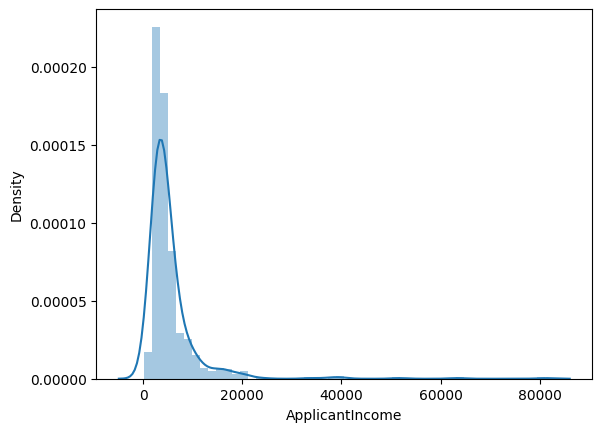

In [ ]:
sns.distplot(df.ApplicantIncome)

<Axes: ylabel='ApplicantIncome'>

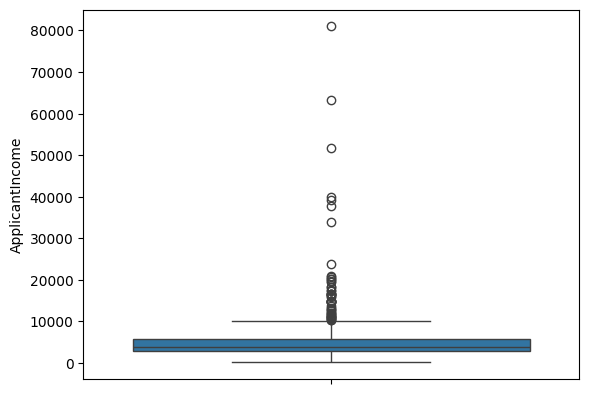

In [ ]:
sns.boxplot(df.ApplicantIncome)

In [ ]:
df.Education.value_counts(normalize=True)*100

,proportion
Education,
Graduate,78.175896
Not Graduate,21.824104


In [ ]:
(df.isnull().sum()/df.shape[0])*100

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


In [ ]:
df["total_income"]=df["ApplicantIncome"]+df["CoapplicantIncome"]
df.total_income
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,total_income
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,7024.705081
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,6458.663872
min,150.000000,0.000000,9.000000,12.00000,0.000000,1442.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,5416.500000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,81000.000000


<ipython-input-16-c7439a542ba6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_income'])


<Axes: xlabel='total_income', ylabel='Density'>

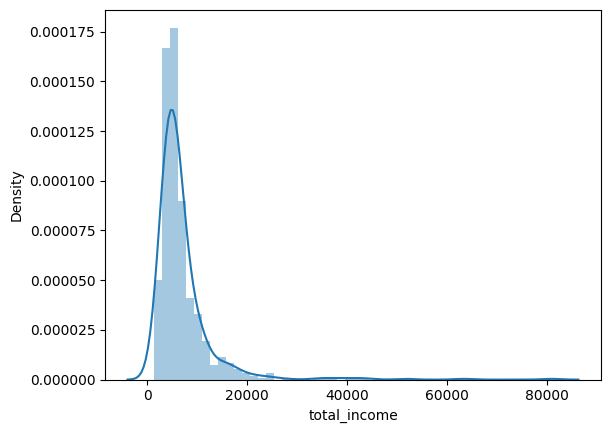

In [ ]:
sns.distplot(df['total_income'])

<ipython-input-17-df60583bf01e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['total_income']))


<Axes: xlabel='total_income', ylabel='Density'>

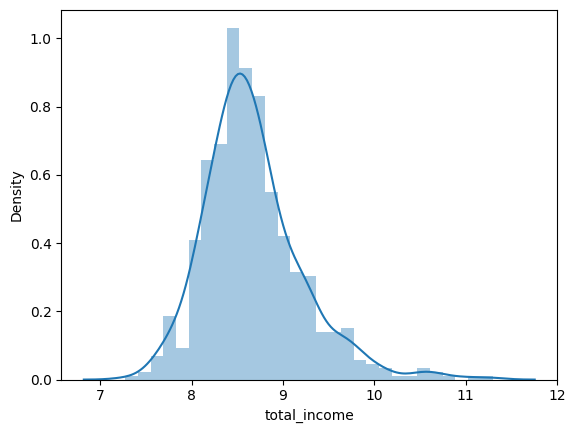

In [ ]:
sns.distplot(np.log(df['total_income']))

<ipython-input-18-0451dfbda27d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(df['total_income']))


<Axes: xlabel='total_income', ylabel='Density'>

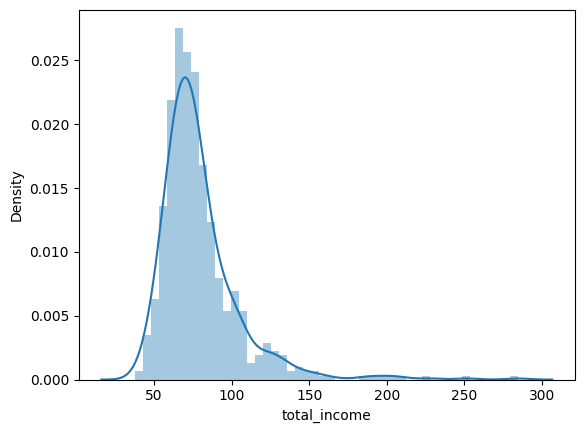

In [ ]:
sns.distplot(np.sqrt(df['total_income']))

In [ ]:
df["total_income_log"]=np.log(df["total_income"])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<Axes: ylabel='total_income'>

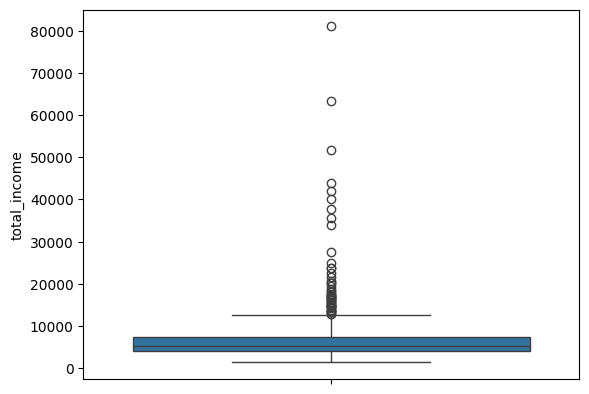

In [ ]:
sns.boxplot(df['total_income'])

<Axes: ylabel='total_income_log'>

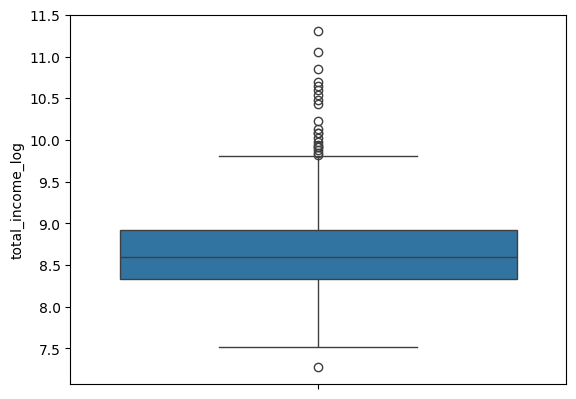

In [ ]:
sns.boxplot(df['total_income_log'])

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'total_income', 'total_income_log'],
      dtype='object')

In [ ]:
m=np.mean(df["total_income_log"])
sd=np.std(df["total_income_log"])
pqq=np.percentile(df["total_income_log"],99)
IQR=np.percentile(df["total_income_log"],75)-np.percentile(df["total_income_log"],25)

In [ ]:
print(f"mean + 3*std: {df.loc[df['total_income_log'] > m + 3 * sd, 'Loan_ID'].count()}")

mean + 3*std: 9


In [ ]:
df["total_income_log"]=np.where(df["total_income_log"]>pqq,pqq,df["total_income_log"])

<Axes: ylabel='total_income_log'>

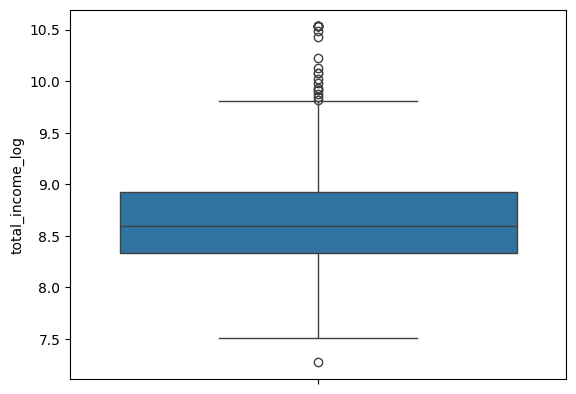

In [ ]:
sns.boxplot(df['total_income_log'])

<Axes: xlabel='total_income_log', ylabel='Density'>

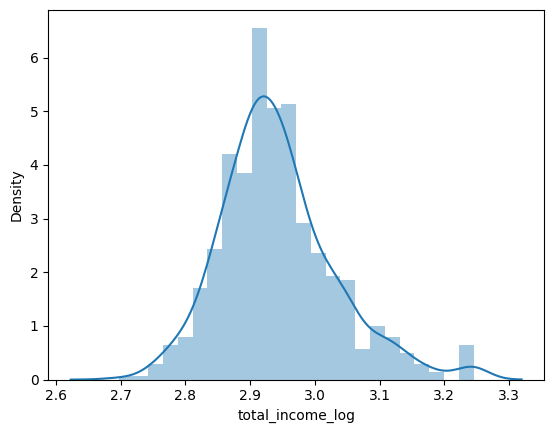

In [ ]:
sns.distplot(np.sqrt(df['total_income_log']))

In [ ]:
m=np.mean(df["LoanAmount"].dropna())
sd=np.std(df["LoanAmount"].dropna())
pqq=np.percentile(df["LoanAmount"],99)
IQR=np.percentile(df["LoanAmount"],75)-np.percentile(df["LoanAmount"],25)


In [ ]:
print(f"mean + 3*std: {df.loc[df['LoanAmount'] > m + 3 * sd, 'Loan_ID'].count()}")

mean + 3*std: 14


In [ ]:
df.Loan_Amount_Term.value_counts(normalize=True)*100

,proportion
Loan_Amount_Term,
360.0,85.333333
180.0,7.333333
480.0,2.500000
300.0,2.166667
240.0,0.666667
84.0,0.666667
120.0,0.500000
60.0,0.333333
36.0,0.333333


<Axes: xlabel='LoanAmount', ylabel='Density'>

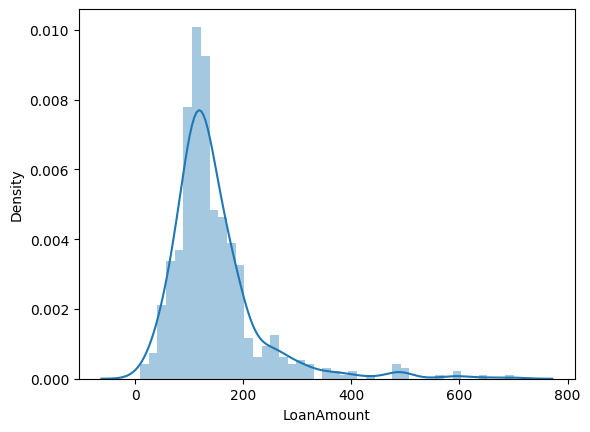

In [ ]:
sns.distplot(df.LoanAmount)

<Axes: ylabel='LoanAmount'>

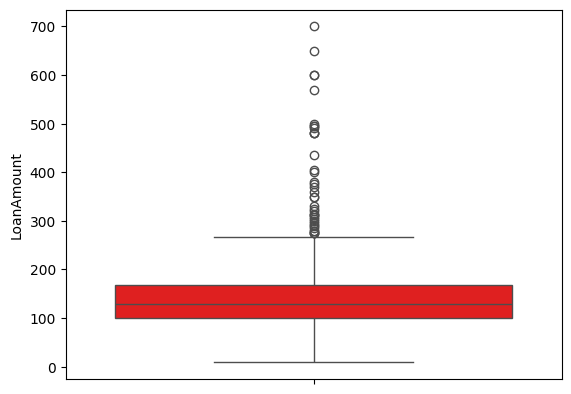

In [ ]:
sns.boxplot(df.LoanAmount,color="red")

In [ ]:
df.LoanAmount.describe()

,LoanAmount
count,592.000000
mean,146.412162
std,85.587325
min,9.000000
25%,100.000000
50%,128.000000
75%,168.000000
max,700.000000


In [ ]:
df.LoanAmount.value_counts()

,count
LoanAmount,
120.0,20
110.0,17
100.0,15
160.0,12
187.0,12
...,...
240.0,1
214.0,1
59.0,1


In [ ]:
df.Credit_History.describe()

,Credit_History
count,564.000000
mean,0.842199
std,0.364878
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
df.Credit_History.value_counts(normalize=True)*100



,proportion
Credit_History,
1.0,84.219858
0.0,15.780142


In [ ]:
df.Credit_History.value_counts()

,count
Credit_History,
1.0,475
0.0,89


In [ ]:
df.Credit_History.fillna('Missing').value_counts(normalize=True)*100

,proportion
Credit_History,
1.0,77.361564
0.0,14.495114
Missing,8.143322


In [ ]:
df.Credit_History.fillna(0, inplace=True)

In [ ]:
df.Credit_History.value_counts(normalize=True)*100

,proportion
Credit_History,
1.0,77.361564
0.0,22.638436


In [ ]:
#Lab5
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.Gender.value_counts(normalize=True)*100

,proportion
Gender,
Male,81.364393
Female,18.635607


In [ ]:
df.Gender.fillna('Missing').value_counts(normalize=True)*100

,proportion
Gender,
Male,79.641694
Female,18.241042
Missing,2.117264


In [ ]:
pd.crosstab(df.Gender.fillna('Missing'), df.Education)

Education,Graduate,Not Graduate
Gender,,
Female,92,20
Male,376,113
Missing,12,1


<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

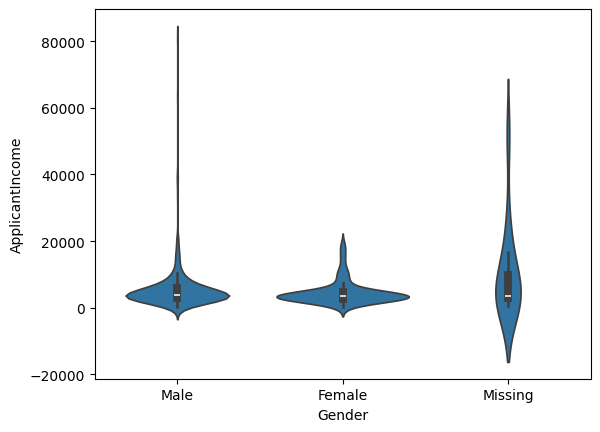

In [ ]:
sns.violinplot(x=df.Gender.fillna('Missing'), y=df.ApplicantIncome)

In [ ]:
pd.crosstab(df.Gender.fillna('Missing'), df.Married)

Married,No,Yes
Gender,,
Female,80,31
Male,130,357
Missing,3,10


In [ ]:
df.loc[(df.Married=='Yes')&(df.Gender.isnull()),'Gender']

,Gender
23,NaN
126,NaN
171,NaN
188,NaN
314,NaN
334,NaN
460,NaN
467,NaN
477,NaN
576,NaN


In [ ]:
df.loc[(df.Married=='Yes')&(df.Gender.isnull()),'Gender']="Male"

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,3
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.Gender.fillna('Male', inplace=True)

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df.Married.value_counts(normalize=True)*100

,proportion
Married,
Yes,65.139116
No,34.860884


In [ ]:
df.Married.fillna('Missing').value_counts(normalize=True)*100

,proportion
Married,
Yes,64.820847
No,34.690554
Missing,0.488599


In [ ]:
pd.crosstab(df.Married.fillna('Missing'), df.Gender)

Gender,Female,Male
Married,,
Missing,1,2
No,80,133
Yes,31,367


In [ ]:
df.loc[(df.Gender=='Female')&(df.Married.isnull()),'Married']="No"

In [ ]:
df.loc[(df.Gender=='Male')&(df.Married.isnull()),'Married']="Yes"

In [ ]:
pd.crosstab(df.Married.fillna('Missing'), df.Gender)

Gender,Female,Male
Married,,
No,81,133
Yes,31,369


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<Axes: xlabel='Dependents', ylabel='total_income'>

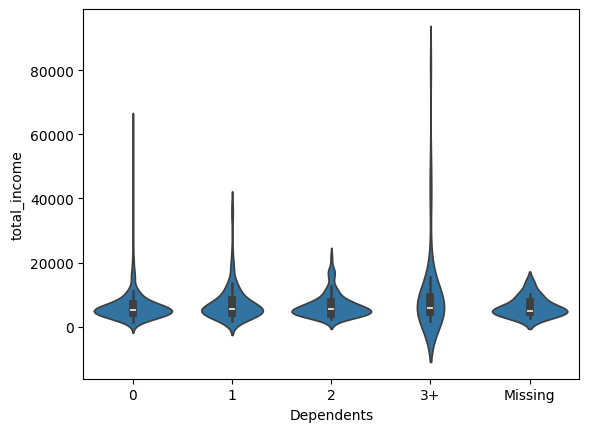

In [ ]:
sns.violinplot(x=df.Dependents.fillna('Missing'), y=df.total_income)

In [ ]:
df.loc[(df.Dependents.isnull()), 'Dependents']=2

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
pd.crosstab(df.Self_Employed.fillna('Missing'), df.Gender)

Gender,Female,Male
Self_Employed,,
Missing,8,24
No,89,411
Yes,15,67


<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

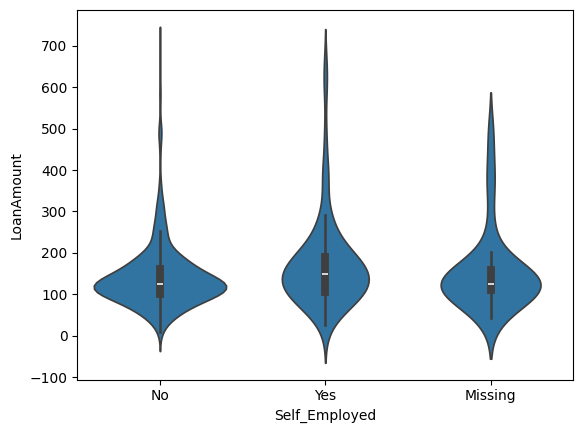

In [ ]:
sns.violinplot(x=df.Self_Employed.fillna('Missing'), y=df.LoanAmount)

In [ ]:
pd.crosstab(df.Self_Employed.fillna('Missing'), df.Credit_History)

Credit_History,0.0,1.0
Self_Employed,,
Missing,7,25
No,113,387
Yes,19,63


In [ ]:
df.loc[(df.Self_Employed.isnull()), 'Self_Employed']='Yes'

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

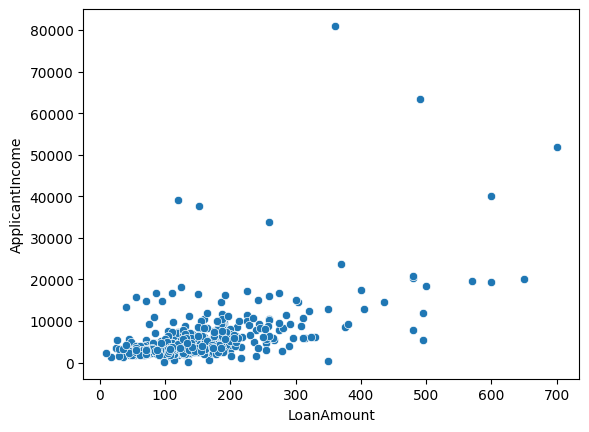

In [ ]:
sns.scatterplot(x=df.LoanAmount, y=df.ApplicantIncome)

In [ ]:
df.groupby('Gender')['LoanAmount'].mean()

,LoanAmount
Gender,
Female,126.697248
Male,150.861284


In [ ]:
df.groupby('Education')['LoanAmount'].mean()

,LoanAmount
Education,
Graduate,154.060215
Not Graduate,118.409449


In [ ]:
df.groupby('Self_Employed')['LoanAmount'].mean()

,LoanAmount
Self_Employed,
No,141.748963
Yes,166.845455


In [ ]:
df.groupby('Married')['LoanAmount'].mean()

,LoanAmount
Married,
No,128.883495
Yes,155.766839


In [ ]:
df['LoanAmount'].fillna(df.groupby('Education')['LoanAmount'].transform('mean'), inplace=True)

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14


In [ ]:
df.Loan_Amount_Term.value_counts(normalize=True)*100

,proportion
Loan_Amount_Term,
360.0,85.333333
180.0,7.333333
480.0,2.500000
300.0,2.166667
240.0,0.666667
84.0,0.666667
120.0,0.500000
60.0,0.333333
36.0,0.333333


In [ ]:
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df1=df.copy()

In [ ]:
df2=pd.read_csv("/content/test_lAUu6dG.csv")

In [ ]:
df2["total_income"]=df2["ApplicantIncome"]+df2["CoapplicantIncome"]
df2.total_income

,total_income
0,5720
1,4576
2,6800
3,4886
4,3276
...,...
362,5786
363,4867
364,5243
365,7393


In [ ]:
df2["total_income_log"]=np.log(df2["total_income"])

In [ ]:
pqq=np.percentile(df2["total_income_log"],99)
pqq

10.173665143824469

In [ ]:
df2["total_income_log"]=np.where(df2["total_income_log"]>pqq,pqq,df2["total_income_log"])

In [ ]:
pqq=np.percentile(df2["LoanAmount"].dropna(),99)
pqq

371.6999999999996

In [ ]:
df2["LoanAmount"]=np.where(df2["LoanAmount"]>pqq,pqq,df2["LoanAmount"])

In [ ]:
df2.Credit_History.fillna(0, inplace=True)

In [ ]:
df2.Gender.fillna('Male', inplace=True)

In [ ]:
pd.crosstab(df2.Married.fillna('Missing'), df2.Gender)

Gender,Female,Male
Married,,
No,44,90
Yes,26,207


In [ ]:
df2.Dependents.fillna(2, inplace=True)

In [ ]:
pd.crosstab(df2.Self_Employed.fillna('Missing'), df2.Gender)

Gender,Female,Male
Self_Employed,,
Missing,3,20
No,63,244
Yes,4,33


In [ ]:
df2['LoanAmount'].fillna(df2.groupby('Education')['LoanAmount'].transform('mean'), inplace=True)

In [ ]:
df2.Loan_Amount_Term.fillna(df2.Loan_Amount_Term.mode()[0], inplace=True)

In [ ]:
df2.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df2.Self_Employed.fillna('Yes', inplace=True)

In [ ]:
df2.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df1_1=df.drop(['Loan_ID'], axis=1)

In [ ]:
df2_2=df2.drop(['Loan_ID'], axis=1)

In [ ]:
x_train=df1_1.drop(['Loan_Status'], axis=1)
y_train=df1_1['Loan_Status']

In [ ]:
x_test=df2_2.copy()

In [ ]:
x_train=pd.get_dummies(x_train, drop_first=True)

In [ ]:
x_test=pd.get_dummies(x_test, drop_first=True)

In [ ]:
x_train.drop(['total_income', 'ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [ ]:
x_train.shape

(614, 14)

In [ ]:
x_test.shape

(367, 17)

In [ ]:
x_test.drop(['total_income', 'ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)

In [ ]:
x_test.shape

(367, 14)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
reg=LogisticRegression()

In [ ]:
reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred=reg.predict(x_test)

In [ ]:
print(y_pred)

['Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y

In [ ]:
prediction=pd.concat([df2.Loan_ID,pd.DataFrame(y_pred)],axis=1)

In [ ]:
prediction.columns=['Loan_ID','Loan_Status']

In [ ]:
prediction.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,Y


In [ ]:
prediction.to_csv('Pred1_LR.csv', index=False)

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()


In [ ]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt.predict(x_test)

In [ ]:
prediction_dt = pd.concat([df2.Loan_ID, pd.DataFrame(y_pred_dt)], axis=1)

In [ ]:
prediction_dt.columns = ['Loan_ID', 'Loan_Status']

In [ ]:
prediction_dt.to_csv('Pred1_DT.csv', index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(x_test)

In [ ]:
prediction_rf = pd.concat([df2.Loan_ID, pd.DataFrame(y_pred_rf)], axis=1)

In [ ]:
prediction_rf.columns = ['Loan_ID', 'Loan_Status']

In [ ]:
prediction_rf.to_csv('Pred1_RF.csv', index=False)

In [ ]:
import xgboost as xgb

In [ ]:
xgb_classifier = xgb.XGBClassifier()

In [ ]:
xgb_classifier.fit(x_train,np.where(y_train=="Y",1,0))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb_classifier.predict(x_test)

In [ ]:
prediction_xgb = pd.concat([df2.Loan_ID, pd.DataFrame(y_pred_xgb)], axis=1)
prediction_xgb.columns = ['Loan_ID', 'Loan_Status']

In [ ]:
prediction_xgb["Loan_Status"]=np.where(prediction_xgb["Loan_Status"]==1,"Y","N")

In [ ]:
prediction_xgb.to_csv('Pred1_XGB.csv', index=False)